In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create sample paper price index data
dates = pd.date_range(start="2020-01-01", end="2024-12-31", freq='M')
np.random.seed(100)
paper_prices = 50 + np.cumsum(np.random.normal(0, 1.2, len(dates)))

paper_df = pd.DataFrame({
    "Date": dates,
    "PriceIndex": np.round(paper_prices, 2)
})

paper_df.head()


,Date,PriceIndex
0,2020-01-31,47.90
1,2020-02-29,48.31
2,2020-03-31,49.70
3,2020-04-30,49.39
4,2020-05-31,50.57


In [2]:
# Create sample economic indicator data (Industrial Production)
np.random.seed(42)
industrial_production = 100 + np.cumsum(np.random.normal(0, 1, len(dates)))

econ_df = pd.DataFrame({
    "Date": dates,
    "IndustrialProduction": np.round(industrial_production, 2)
})

econ_df.head()


,Date,IndustrialProduction
0,2020-01-31,100.50
1,2020-02-29,100.36
2,2020-03-31,101.01
3,2020-04-30,102.53
4,2020-05-31,102.30


In [3]:
# Merge paper prices and economic indicators on Date
merged_df = pd.merge(paper_df, econ_df, on="Date")
merged_df.head()


,Date,PriceIndex,IndustrialProduction
0,2020-01-31,47.90,100.50
1,2020-02-29,48.31,100.36
2,2020-03-31,49.70,101.01
3,2020-04-30,49.39,102.53
4,2020-05-31,50.57,102.30


In [4]:
# Calculate correlation between PriceIndex and IndustrialProduction
correlation = merged_df[['PriceIndex', 'IndustrialProduction']].corr().iloc[0,1]
print(f"Correlation between Paper Price Index and Industrial Production: {correlation:.3f}")


Correlation between Paper Price Index and Industrial Production: 0.362


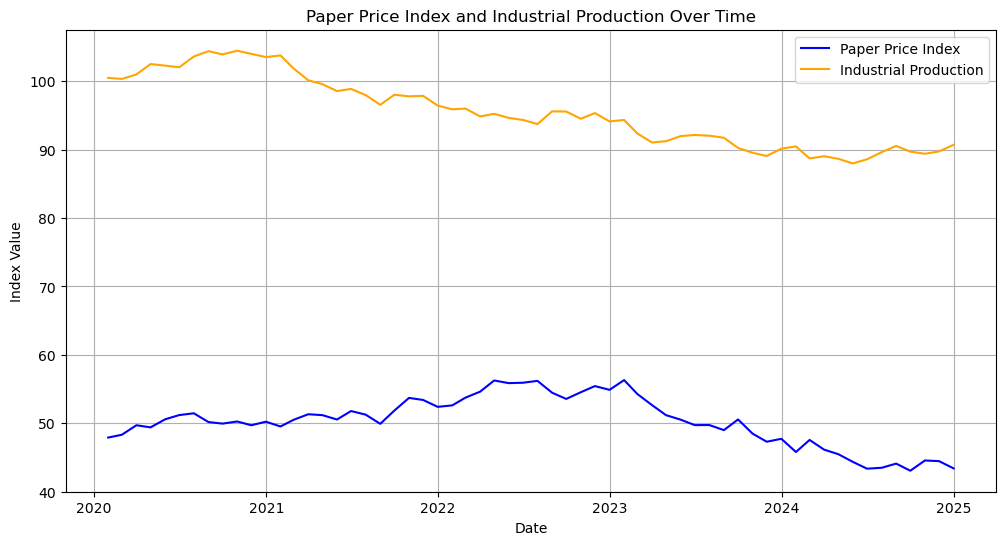

In [5]:
plt.figure(figsize=(12,6))

plt.plot(merged_df['Date'], merged_df['PriceIndex'], label='Paper Price Index', color='blue')
plt.plot(merged_df['Date'], merged_df['IndustrialProduction'], label='Industrial Production', color='orange')

plt.title('Paper Price Index and Industrial Production Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()


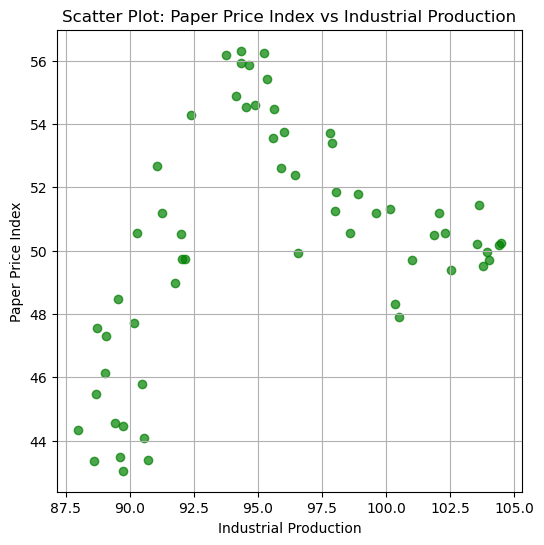

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(merged_df['IndustrialProduction'], merged_df['PriceIndex'], alpha=0.7, color='green')
plt.title('Scatter Plot: Paper Price Index vs Industrial Production')
plt.xlabel('Industrial Production')
plt.ylabel('Paper Price Index')
plt.grid(True)
plt.show()
